# Genre Surf - music genre classification

### 1. Dataset download

In [1]:
# kaggle API 인증
import os
os.environ['KAGGLE_USERNAME'] = "lindocachete"
os.environ['KAGGLE_KEY'] = "e23976ec213f99d8ef61e215e881c977"

In [2]:
# kaggle 안의 GTZAN 활용을 위해 kaggle 설치
!pip install kaggle

In [3]:
# GTZAN의 음악 장르 데이터셋 다운로드 받기
!kaggle datasets download -d andradaolteanu/gtzan-dataset-music-genre-classification

gtzan-dataset-music-genre-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
# 압축파일 압축 해제하기
!unzip -q gtzan-dataset-music-genre-classification.zip

replace Data/features_30_sec.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


### 2. 오디오 파일 분석
    - librosa 활용
    - 오디오 특성 분석 기법:
        1. 음파 그래프
        2. Fourier Transform
        3. Spectogram
        4. Mel Spectogram
        5. BPM
        6. Zero Crossing Rate
        7. Harmonic & Percussive Components
        8. Spectral Centroid
        9. Spectral Rolloff
        10. MFCCs(Mel-Frequency Cepstral Coefficients)
        11. Chroma Frequencies

In [ ]:
!pip install librosa

In [6]:
import librosa

In [7]:
# signal: 소리 및 신호가 떨리는 세기 및 진폭
# sr: 1초당 샘플의 개수(Hz) / Sampling Rate
signal, sampleRate = librosa.load('Data/genres_original/pop/pop.00001.wav')

print(signal)
print(len(signal))
print('Sampling rate: ', sampleRate)
print('Audio length: ', (len(signal) / sampleRate))

[0.7692261  0.2246399  0.69036865 ... 0.21218872 0.21685791 0.24371338]
661504
Sampling rate:  22050
Audio length:  30.00018140589569


In [8]:
# 오디오 파일 확인
import IPython.display as ipd

ipd.Audio(signal, rate = sampleRate)

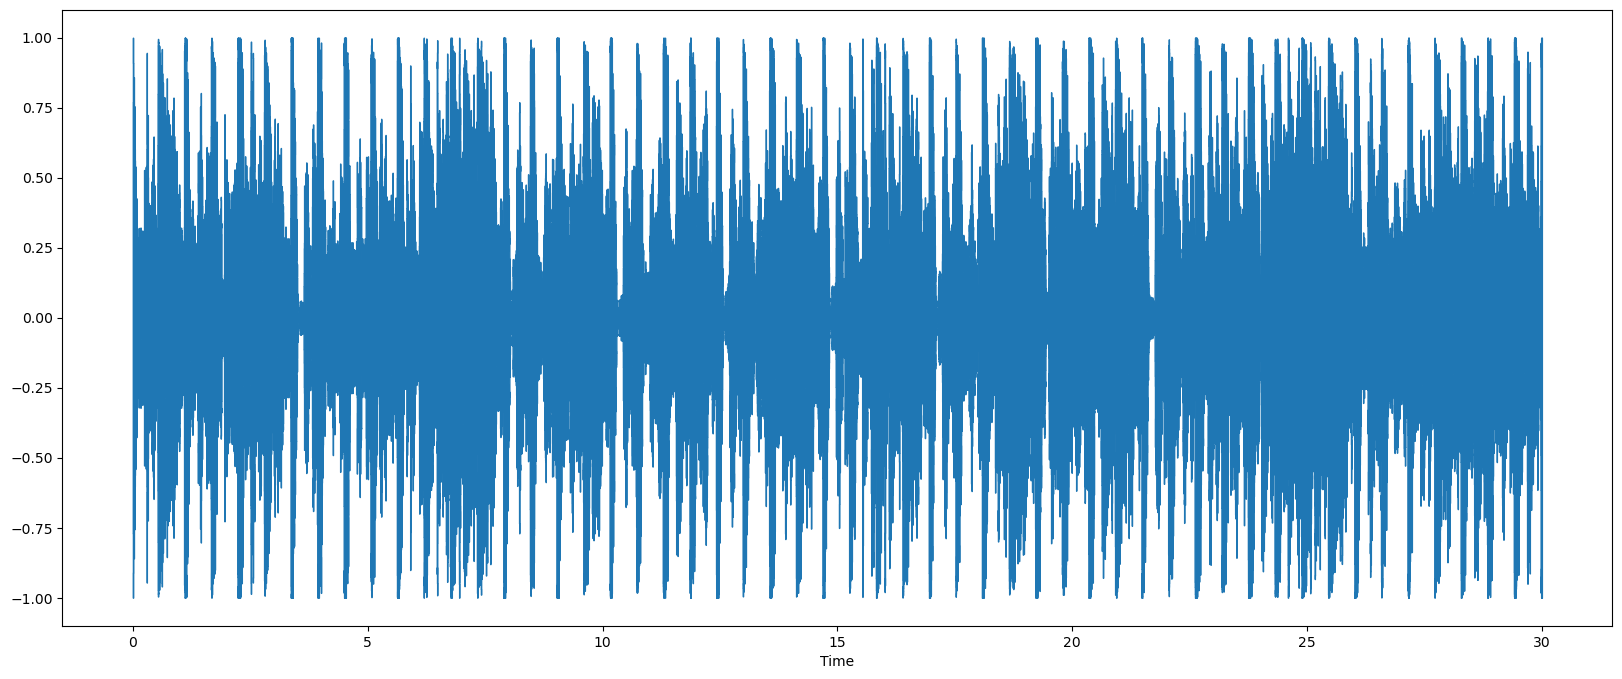

In [9]:
# 오디오 파일의 음파 그래프
# signal을 그래프로 출력
import matplotlib.pyplot as plt
import librosa.display as ld

plt.figure(figsize = (20, 8))
ld.waveshow(signal, sr = sampleRate)
plt.show()

(1025, 1293)


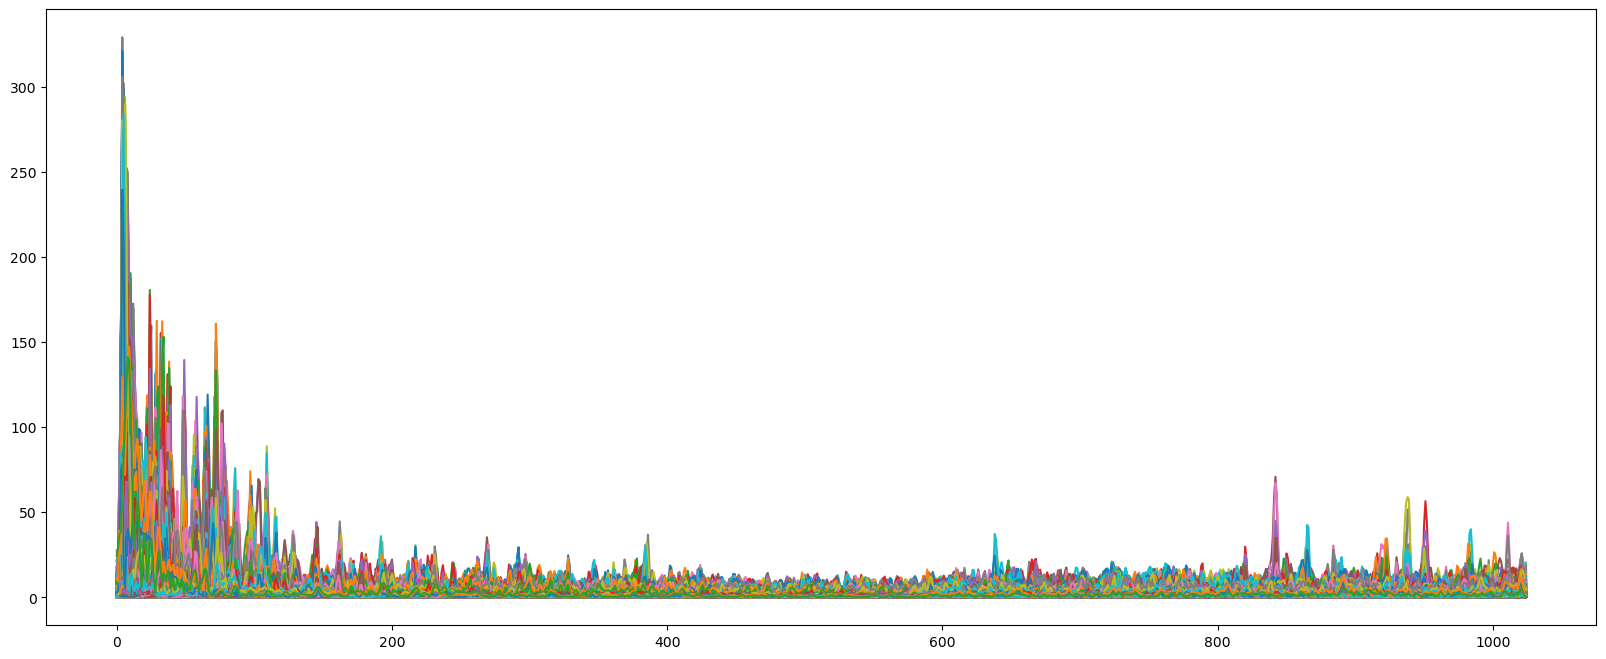

In [10]:
# 진동수를 통한 분석을 위해 Fourier Transform
# 시간 영역의 데이터들을 주파수 영역으로 변경
import numpy as np

data = np.abs(librosa.stft(signal, n_fft = 2048, hop_length = 512))
print(data.shape)
plt.figure(figsize = (20, 8))
plt.plot(data)
plt.show()

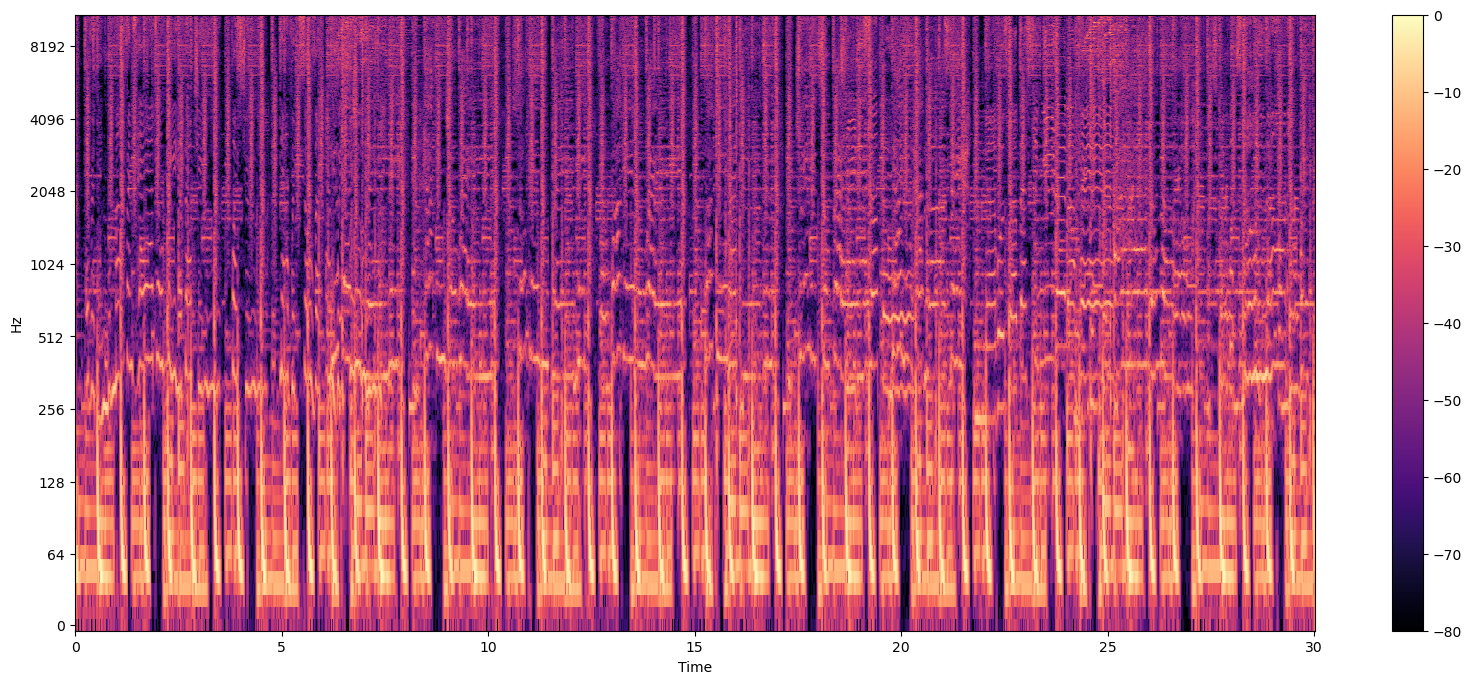

In [11]:
# Spectogram을 활용하여
# 시간에 따른 신호 주파수의 spectrum 그래프 출력
decibel = librosa.amplitude_to_db(data, ref = np.max)

plt.figure(figsize = (20, 8))
librosa.display.specshow(decibel, sr = sampleRate, hop_length = 512, x_axis = 'time', y_axis = 'log')
plt.colorbar()
plt.show()

/var/folders/8m/xj5388nn4kqdpvwfw6s9l2dh0000gn/T/ipykernel_11377/1412235364.py:4: FutureWarning: Pass y=[0.7692261  0.2246399  0.69036865 ... 0.21218872 0.21685791 0.24371338] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  scale = librosa.feature.melspectrogram(signal, sr = sampleRate)


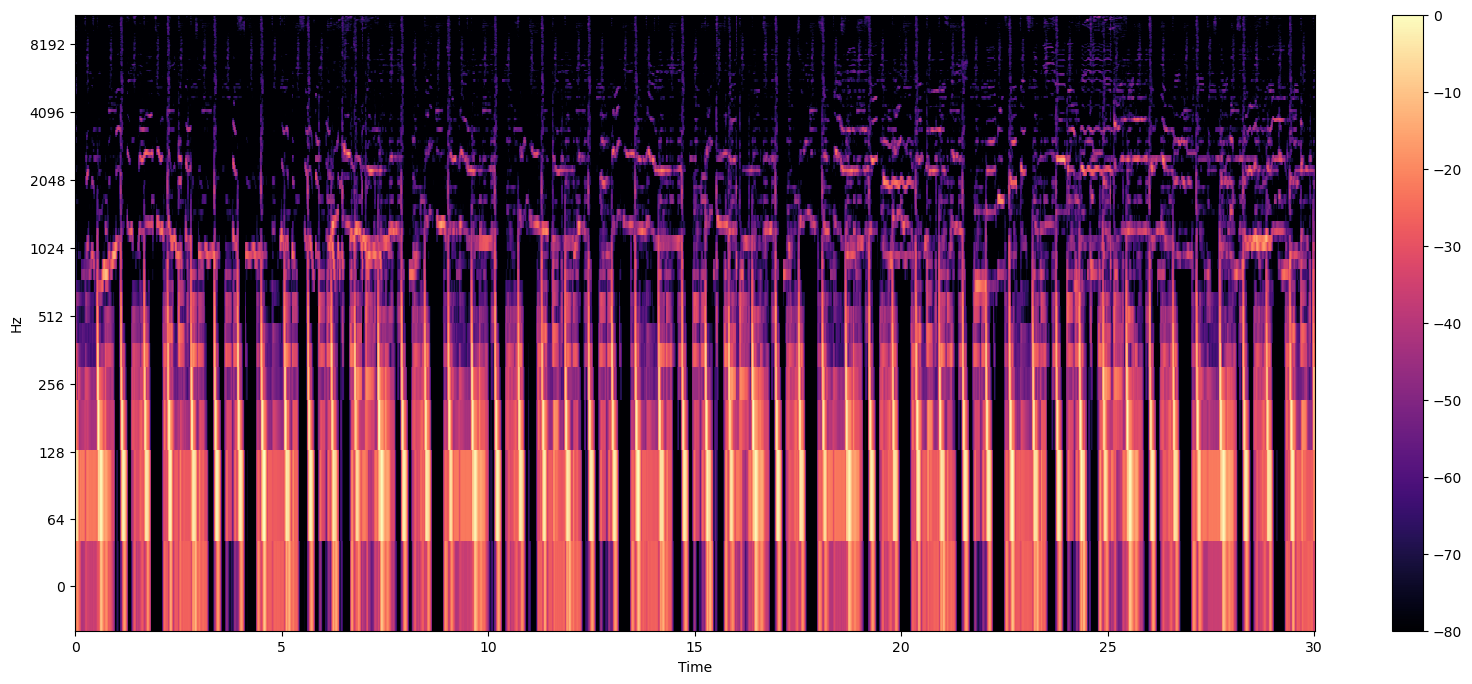

In [12]:
# Mel Spectogram
# 사람이 음을 인지하는 기준의 scale(mel-scale)을 반영하여
# 위의 Spectogram 그래프 변환
scale = librosa.feature.melspectrogram(signal, sr = sampleRate)
scaleDecibel = librosa.amplitude_to_db(scale, ref = np.max)

plt.figure(figsize = (20, 8))
librosa.display.specshow(scaleDecibel, sr = sampleRate, hop_length = 512, x_axis = 'time', y_axis = 'log')
plt.colorbar()
plt.show()

## 오디오 특성 추출

In [14]:
#템포(BPM)
tempo,_ = librosa.beat.beat_track(signal, sr = sampleRate)
print(tempo)

107.666015625


/var/folders/8m/xj5388nn4kqdpvwfw6s9l2dh0000gn/T/ipykernel_11377/194622780.py:2: FutureWarning: Pass y=[0.7692261  0.2246399  0.69036865 ... 0.21218872 0.21685791 0.24371338] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  tempo,_ = librosa.beat.beat_track(signal, sr = sampleRate)


In [15]:
zero_crossings = librosa.zero_crossings(signal, pad=False)

print(zero_crossings)
print(sum(zero_crossings)) # 음 <-> 양 이동한 횟수

[False False False ... False False False]
98964


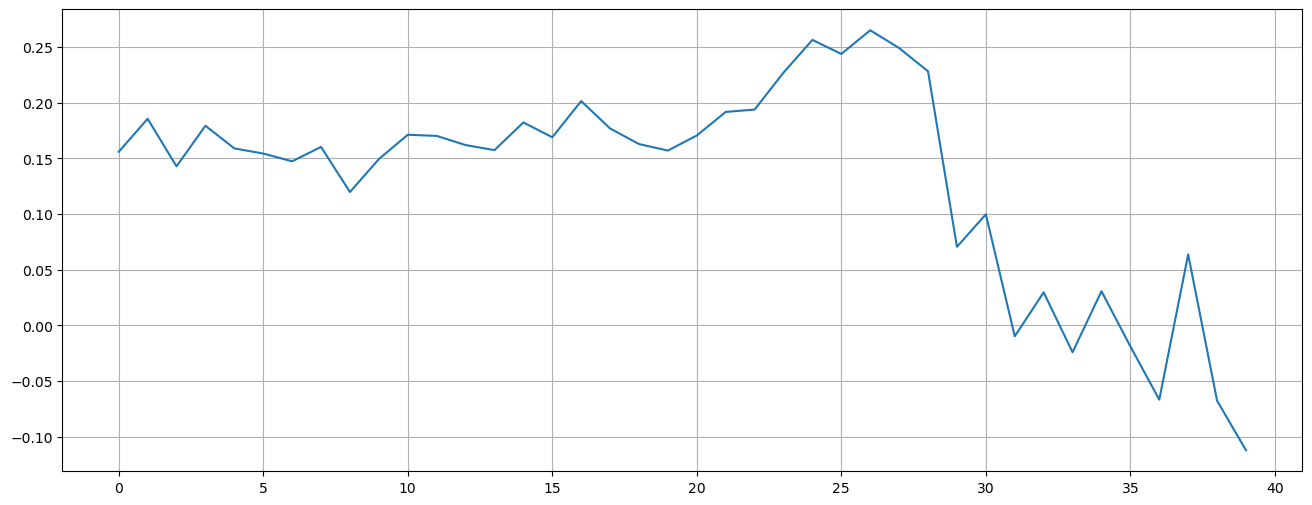

In [17]:
n0 = 9000
n1 = 9040

plt.figure(figsize=(16,6))
plt.plot(signal[n0:n1])
plt.grid()
plt.show()

In [19]:
zero_crossings = librosa.zero_crossings(signal[n0:n1], pad=False) #n0 ~ n1 사이 zero crossings 
print(sum(zero_crossings))

7


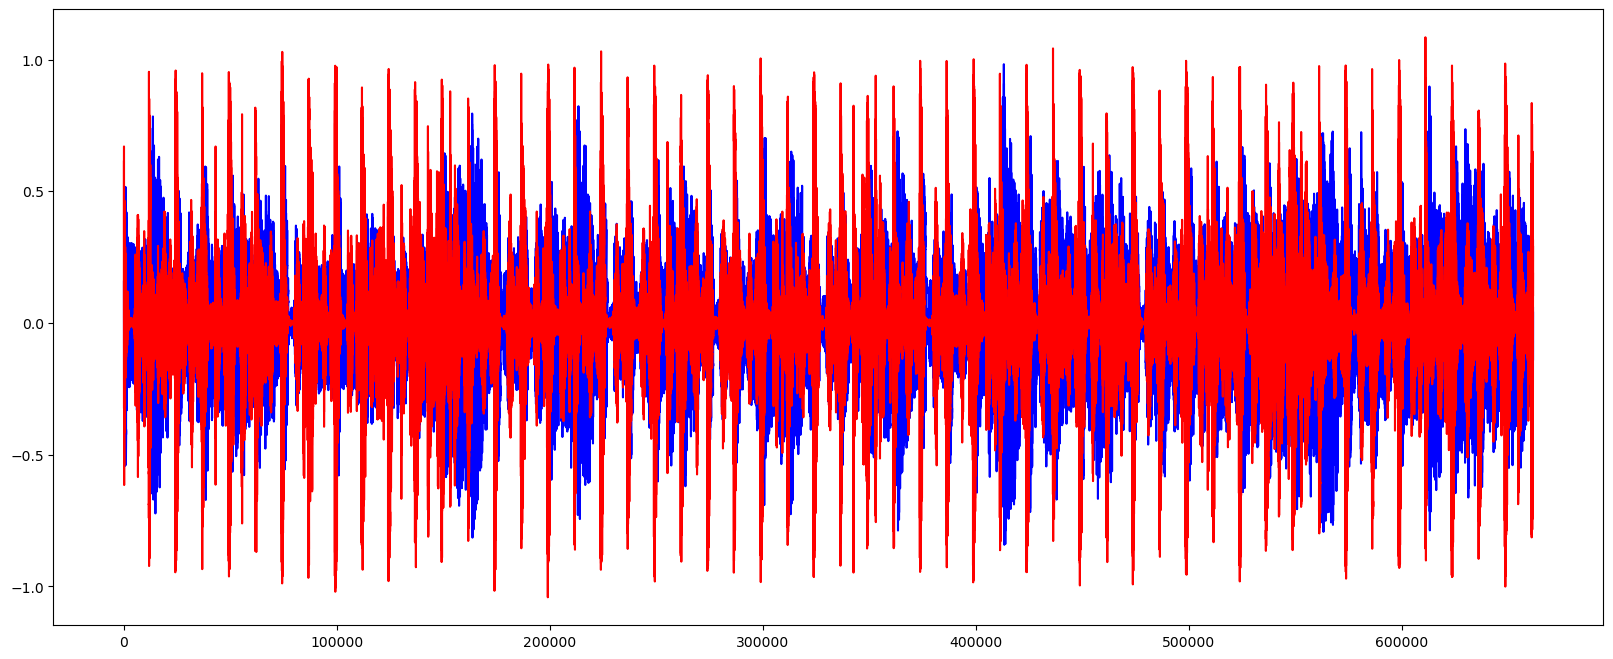

In [21]:
y_harm, y_perc = librosa.effects.hpss(signal)

plt.figure(figsize=(20, 8))
plt.plot(y_harm, color='b')
plt.plot(y_perc, color='r')
plt.show()

/var/folders/8m/xj5388nn4kqdpvwfw6s9l2dh0000gn/T/ipykernel_11377/850880.py:1: FutureWarning: Pass y=[0.7692261  0.2246399  0.69036865 ... 0.21218872 0.21685791 0.24371338] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_centroids = librosa.feature.spectral_centroid(signal, sr=sampleRate)[0]


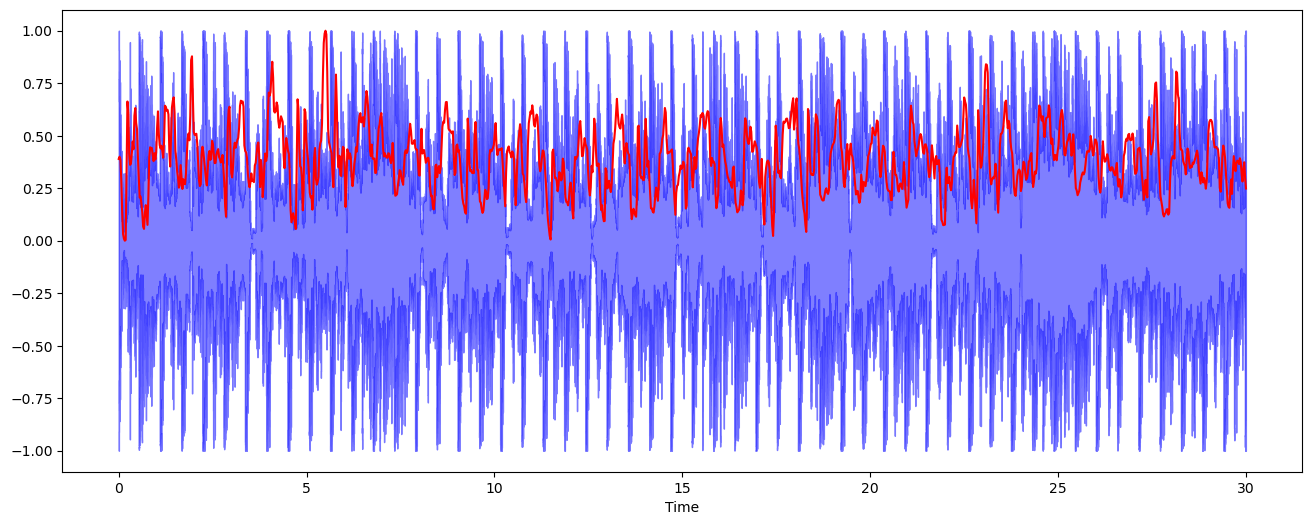

In [26]:
spectral_centroids = librosa.feature.spectral_centroid(signal, sr=sampleRate)[0]

#Computing the time variable for visualization
frames = range(len(spectral_centroids))

# Converts frame counts to time (seconds)
t = librosa.frames_to_time(frames)

import sklearn
def normalize(x, axis=0):
  return sklearn.preprocessing.minmax_scale(x, axis=axis)    #sk.minmax_scale() : 최대 최소를 0 ~ 1 로 맞춰준다.

plt.figure(figsize=(16,6))
librosa.display.waveshow(signal, sr=sampleRate, alpha=0.5, color='b')
plt.plot(t, normalize(spectral_centroids), color='r')
plt.show()

/var/folders/8m/xj5388nn4kqdpvwfw6s9l2dh0000gn/T/ipykernel_11377/2223857355.py:1: FutureWarning: Pass y=[0.7692261  0.2246399  0.69036865 ... 0.21218872 0.21685791 0.24371338] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_rolloff = librosa.feature.spectral_rolloff(signal, sr=sampleRate)[0]


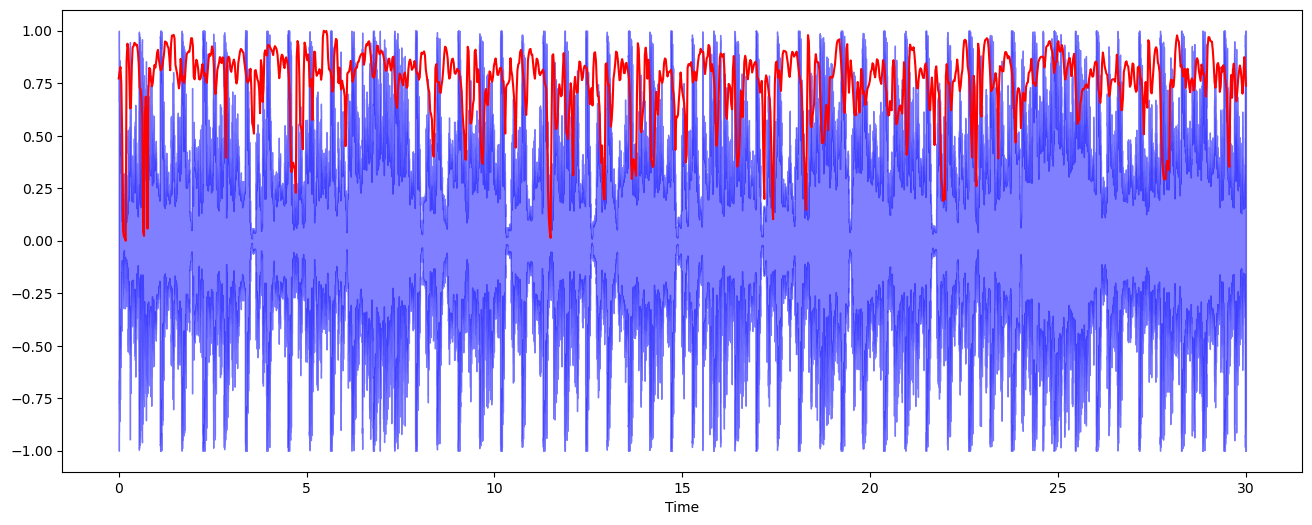

In [30]:
spectral_rolloff = librosa.feature.spectral_rolloff(signal, sr=sampleRate)[0]

plt.figure(figsize=(16,6))
librosa.display.waveshow(signal ,sr=sampleRate ,alpha=0.5,color='b')
plt.plot(t, normalize(spectral_rolloff),color='r')
plt.show()

mean: 0.51
var: 0.03


/var/folders/8m/xj5388nn4kqdpvwfw6s9l2dh0000gn/T/ipykernel_11377/3724763158.py:1: FutureWarning: Pass y=[0.7692261  0.2246399  0.69036865 ... 0.21218872 0.21685791 0.24371338] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(signal, sr=sampleRate)


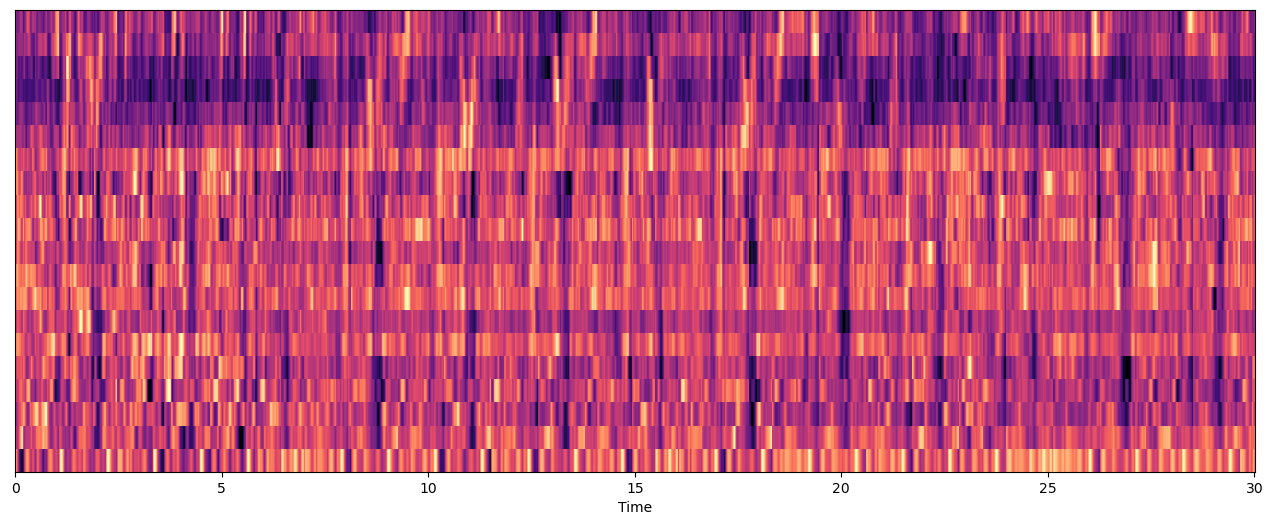

In [33]:
mfccs = librosa.feature.mfcc(signal, sr=sampleRate)
mfccs = normalize(mfccs,axis=1)

print('mean: %.2f' % mfccs.mean())
print('var: %.2f' % mfccs.var())

plt.figure(figsize=(16,6))
librosa.display.specshow(mfccs,sr=sampleRate, x_axis='time')
plt.show()

/var/folders/8m/xj5388nn4kqdpvwfw6s9l2dh0000gn/T/ipykernel_11377/181139834.py:1: FutureWarning: Pass y=[0.7692261  0.2246399  0.69036865 ... 0.21218872 0.21685791 0.24371338] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  chromagram = librosa.feature.chroma_stft(signal, sr=sampleRate, hop_length=512)


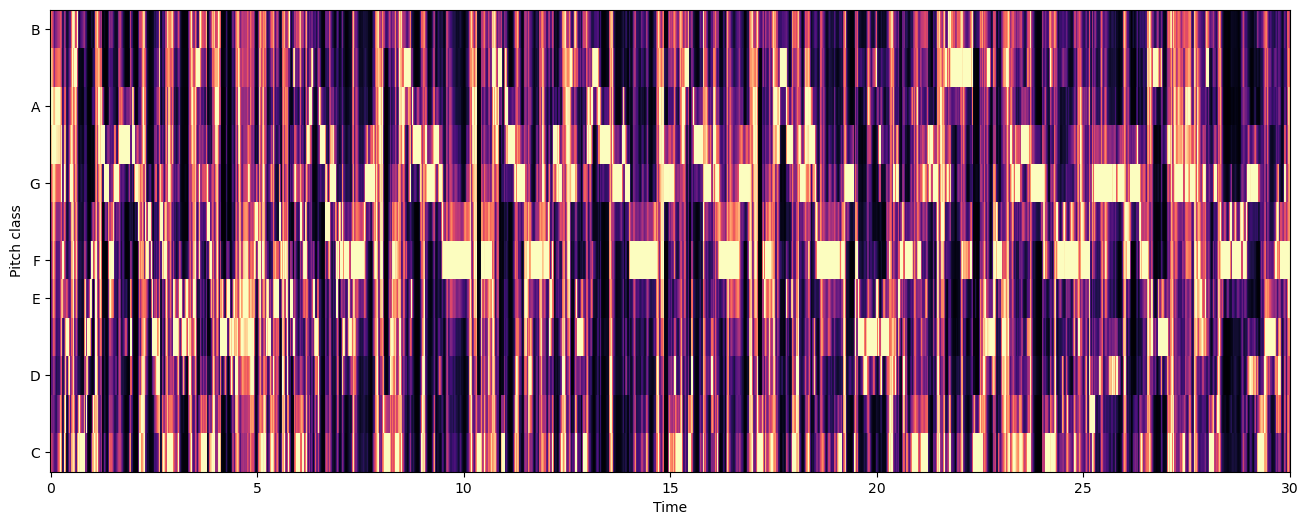

In [34]:
chromagram = librosa.feature.chroma_stft(signal, sr=sampleRate, hop_length=512)

plt.figure(figsize=(16,6))
librosa.display.specshow(chromagram,x_axis='time', y_axis='chroma', hop_length=512)
plt.show()

In [35]:
import pandas as pd

df = pd.read_csv('Data/features_3_sec.csv')

df.head()

filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.0.wav   66149          0.335406         0.091048  0.130405   
1  blues.00000.1.wav   66149          0.343065         0.086147  0.112699   
2  blues.00000.2.wav   66149          0.346815         0.092243  0.132003   
3  blues.00000.3.wav   66149          0.363639         0.086856  0.132565   
4  blues.00000.4.wav   66149          0.335579         0.088129  0.143289   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.003521             1773.065032          167541.630869   
1  0.001450             1816.693777           90525.690866   
2  0.004620             1788.539719          111407.437613   
3  0.002448             1655.289045          111952.284517   
4  0.001701             1630.656199           79667.267654   

   spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0              1972.744388           117335.771563  ...   39.687145   
1              2010.051501            65671.875673  ...   64.748276   
2              2084.565132            75124.921716  ...   67.336563   
3              1960.039988            82913.639269  ...   47.739452   
4              1948.503884            60204.020268  ...   30.336359   

   mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  \
0    -3.241280   36.488243     0.722209   38.099152    -5.050335   33.618073   
1    -6.055294   40.677654     0.159015   51.264091    -2.837699   97.030830   
2    -1.768610   28.348579     2.378768   45.717648    -1.938424   53.050835   
3    -3.841155   28.337118     1.218588   34.770935    -3.580352   50.836224   
4     0.664582   45.880913     1.689446   51.363583    -3.392489   26.738789   

   mfcc20_mean  mfcc20_var  label  
0    -0.243027   43.771767  blues  
1     5.784063   59.943081  blues  
2     2.517375   33.105122  blues  
3     3.630866   32.023678  blues  
4     0.536961   29.146694  blues  

[5 rows x 60 columns]

In [36]:
X = df.drop(columns=['filename','length','label']) 
y = df['label'] #장르명

scaler = sklearn.preprocessing.MinMaxScaler()
np_scaled = scaler.fit_transform(X)

X = pd.DataFrame(np_scaled, columns=X.columns)

X.head()

chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0          0.355399         0.716757  0.293133  0.107955   
1          0.367322         0.670347  0.253040  0.044447   
2          0.373159         0.728067  0.296753  0.141663   
3          0.399349         0.677066  0.298024  0.075042   
4          0.355668         0.689113  0.322308  0.052149   

   spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0                0.262173               0.034784                 0.459205   
1                0.270969               0.018716                 0.470831   
2                0.265293               0.023073                 0.494051   
3                0.238427               0.023187                 0.455246   
4                0.233460               0.016451                 0.451651   

   spectral_bandwidth_var  rolloff_mean  rolloff_var  ...  mfcc16_mean  \
0                0.094130      0.346153     0.083164  ...     0.363613   
1                0.052261      0.363722     0.051694  ...     0.468596   
2                0.059922      0.378215     0.060820  ...     0.479681   
3                0.066234      0.329587     0.070906  ...     0.386258   
4                0.047830      0.318453     0.046916  ...     0.438567   

   mfcc16_var  mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  \
0    0.056198     0.397172    0.066062     0.371828    0.055344     0.380831   
1    0.092912     0.351681    0.074001     0.362068    0.076365     0.418452   
2    0.096704     0.420979    0.050639     0.400536    0.067509     0.433742   
3    0.067995     0.387474    0.050617     0.380430    0.050030     0.405824   
4    0.042500     0.460314    0.083860     0.388590    0.076524     0.409019   

   mfcc19_var  mfcc20_mean  mfcc20_var  
0    0.026797     0.506746    0.047781  
1    0.082414     0.593029    0.065548  
2    0.043841     0.546264    0.036062  
3    0.041898     0.562204    0.034873  
4    0.020763     0.517913    0.031713  

[5 rows x 57 columns]

In [58]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train, y_test = train_test_split(X,y , test_size=0.2, random_state=2021)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7992, 57) (7992,)
(1998, 57) (1998,)


In [61]:
from xgboost import XGBClassifier #xgboost 모델이 좋다길래 ..!!
from sklearn.metrics import accuracy_score

xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05) #1000개의 가지? epoch? , 0.05 학습률
xgb.fit(X = X_train, y = y_train) #학습

y_preds = xgb.predict(X_test) #검증

print('Accuracy: %.2f' % accuracy_score(y_test,y_preds))

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3 4 5 6 7 8 9], got ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']